# Dự đoán thiệt hại về kinh tế (dola) do thảm họa gây ra

# xem nhanh qua data

In [1]:
import pandas as pd

df = pd.read_csv("global_disaster_response_2018_2024.csv")
df.head()

,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
0,31/1/2021,Brazil,Earthquake,5.99,111,7934365.71,15.62,271603.79,83.21,67,-30.613,-122.557
1,23/12/2018,Brazil,Extreme Heat,6.53,100,8307648.99,5.03,265873.81,96.18,55,10.859,-159.194
2,10/8/2020,India,Hurricane,1.55,22,765136.99,32.54,49356.49,60.40,22,0.643,-160.978
3,15/9/2022,Indonesia,Extreme Heat,4.55,94,1308251.31,7.83,237512.88,86.41,47,-33.547,30.350
4,28/9/2022,United States,Wildfire,3.80,64,2655864.36,21.90,188910.69,72.81,42,-19.170,-117.137


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       50000 non-null  object 
 1   country                    50000 non-null  object 
 2   disaster_type              50000 non-null  object 
 3   severity_index             50000 non-null  float64
 4   casualties                 50000 non-null  int64  
 5   economic_loss_usd          50000 non-null  float64
 6   response_time_hours        50000 non-null  float64
 7   aid_amount_usd             50000 non-null  float64
 8   response_efficiency_score  50000 non-null  float64
 9   recovery_days              50000 non-null  int64  
 10  latitude                   50000 non-null  float64
 11  longitude                  50000 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 4.6+ MB


In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,5.02,100.59,5068593.45,12.18,250000.33,87.57,49.68,0.23,0.09
std,1.94,65.05,3268540.52,9.26,143227.51,10.19,20.10,34.76,98.38
min,1.00,0.00,527.39,1.00,16.60,29.75,2.00,-59.99,-170.00
25%,3.66,51.00,2585513.48,6.27,142966.34,83.06,36.00,-29.85,-85.55
50%,4.99,91.00,4548350.74,10.51,230536.47,89.18,49.00,0.27,0.39
75%,6.34,138.00,6950614.61,15.45,335225.93,94.70,63.00,30.49,85.67
max,10.00,524.00,24456237.87,63.10,1126465.23,100.00,112.00,60.00,170.00


 - 0   country                    Quốc gia
 - 1   disaster_type              Loại thảm họa
 - 2   severity_index             mức độ thảm họa
 - 3   casualties                 người bị ảnh hưởng
 - 4   response_time_hours        thời gian phản ứng
 - 5   aid_amount_usd             tổng viện trợ quốc tế
 - 6   response_efficiency_score  điểm hiệu quả phản ứng
 - 7   recovery_days              ngày hồi phục
 - 8   latitude                   vĩ độ
 - 9   longitude                  kinh độ
 - 10  economic_loss_usd          thiệt hại kinh tế

In [4]:
# kiểm tra lặp
df.duplicated().sum()

np.int64(0)

In [5]:
# kiểm tra thiếu
df.isnull().sum()

date                         0
country                      0
disaster_type                0
severity_index               0
casualties                   0
economic_loss_usd            0
response_time_hours          0
aid_amount_usd               0
response_efficiency_score    0
recovery_days                0
latitude                     0
longitude                    0
dtype: int64

- dữ liệu nhiều rất sạch không lặp, không missing.

# Phân tích economic_loss_usd thiệt hại do thảm họa

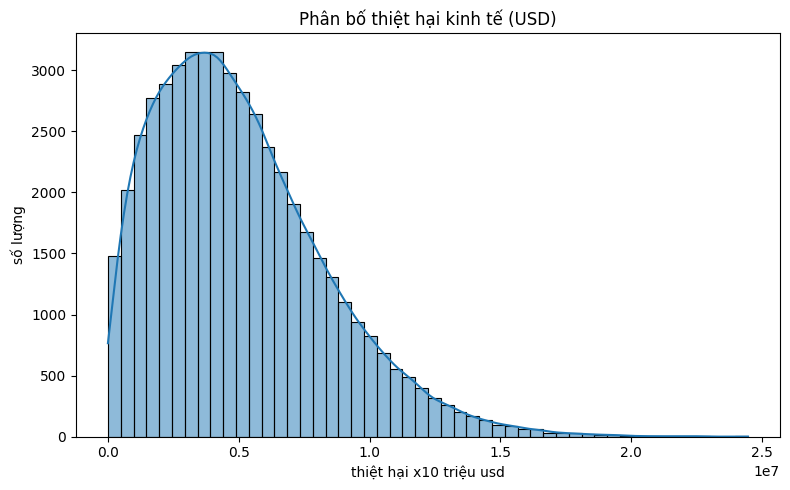

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["economic_loss_usd"], bins=50, kde=True)
plt.title("Phân bố thiệt hại kinh tế (USD)")
plt.xlabel("thiệt hại x10 triệu usd")
plt.ylabel("số lượng")
plt.tight_layout()
plt.show()


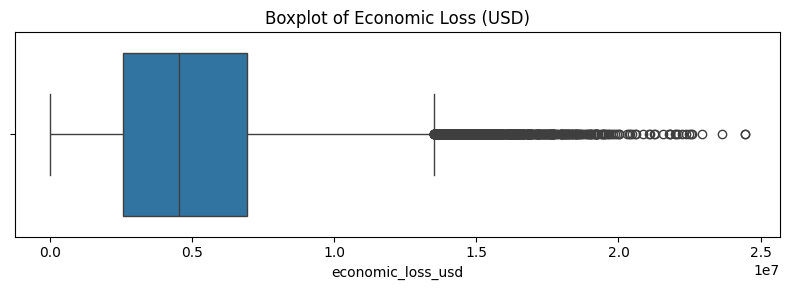

In [7]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df["economic_loss_usd"])
plt.title("Boxplot of Economic Loss (USD)")
plt.xlabel("economic_loss_usd")
plt.tight_layout()
plt.show()


50% dữ liệu trong khoảng 2,5tr đô - 6tr đô, dữ liệu bị lệch phải mạnh quá nhiều outliner => đây là lý do khuyến mô hình xử lý các dữ liệu bị lệch trái so với thực tế

C:\Users\khoa\AppData\Local\Temp\ipykernel_12320\395421232.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


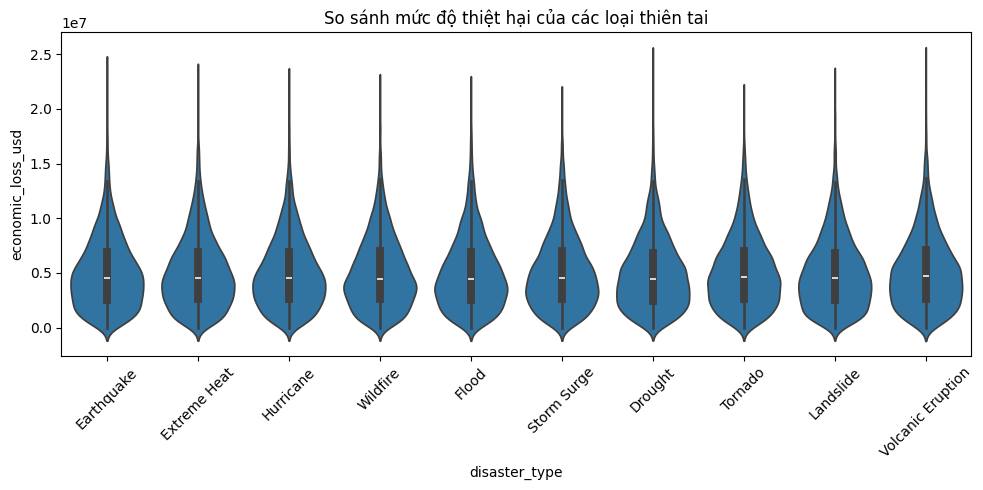

In [23]:
plt.figure(figsize=(10,5))
sns.violinplot(
    data=df,
    x="disaster_type",
    y="economic_loss_usd",
    scale="width"
)
plt.xticks(rotation=45)
plt.title("So sánh mức độ thiệt hại của các loại thiên tai")
plt.tight_layout()
plt.show()


Các loại thiên tai gây thiệt hại trung bình ngang nhau thiệt hại kinh tế nặng nhất là hạn hán, núi lửa phun trào và lụt có thiệt hại trung bình cao hơn các loại khác

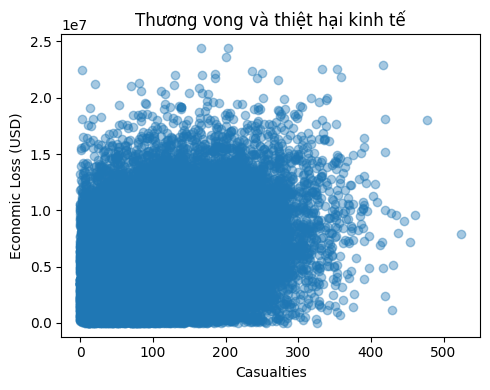

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
plt.scatter(
    df["casualties"],
    df["economic_loss_usd"],
    alpha=0.4
)
plt.xlabel("Casualties")
plt.ylabel("Economic Loss (USD)")
plt.title("Thương vong và thiệt hại kinh tế")
plt.tight_layout()
plt.show()


- Thương vong tăng => thiệt hại kinh tế tăng, biểu đồ có thể hiện nhưng không rõ lắm

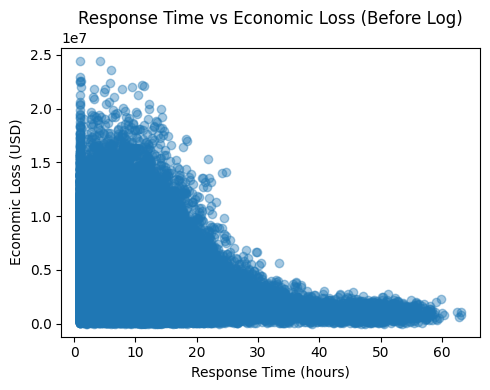

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(
    df["response_time_hours"],
    df["economic_loss_usd"],
    alpha=0.4
)
plt.xlabel("Response Time (hours)")
plt.ylabel("Economic Loss (USD)")
plt.title("thời gian phản ứng với thiệt ")
plt.tight_layout()
plt.show()



In [ ]:
- thời gian phản ứng càng nhanh thiệt hại càng lớn => thảm họa thiệt hại kinh tế càng lớn phản ứng càng nhanh 

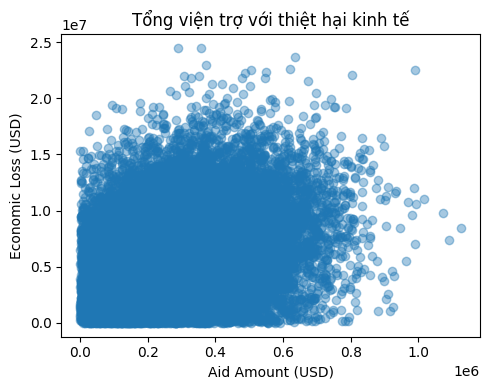

In [65]:
plt.figure(figsize=(5,4))
plt.scatter(
    df["aid_amount_usd"],
    df["economic_loss_usd"],
    alpha=0.4
)
plt.xlabel("Aid Amount (USD)")
plt.ylabel("Economic Loss (USD)")
plt.title("Tổng viện trợ với thiệt hại kinh tế")
plt.tight_layout()
plt.show()



- biểu đồ thể hiện được tổng viện trợ quốc tế tăng thì thiệt hại kinh tế lớn

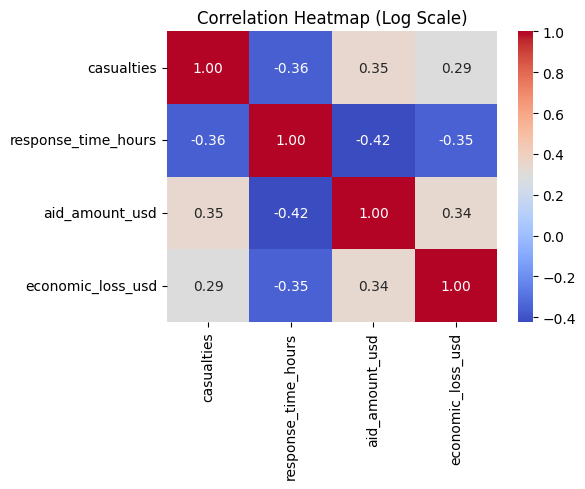

In [69]:
import numpy as np

log_df = df[cols].apply(np.log1p)

plt.figure(figsize=(6,5))
sns.heatmap(
    log_df.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap (Log Scale)")
plt.tight_layout()
plt.show()


In [7]:
!pip install xgboost


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 11.2 MB/s eta 0:00:07
   ------- -------------------------------- 12.8/72.0 MB 50.3 MB/s eta 0:00:02
   ----------- ---------------------------- 21.0/72.0 MB 55.2 MB/s eta 0:00:01
   ------------------- -------------------- 35.7/72.0 MB 55.3 MB/s eta 0:00:01
   ---------------------- ----------------- 40.9/72.0 MB 46.4 MB/s eta 0:00:01
   --------------------------------- ------ 60.0/72.0 MB 56.3 MB/s eta 0:00:01
   ---------------------------------------- 72.0/72.0 MB 56.7 MB/s  0:00:01


In [43]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from xgboost import XGBRegressor



In [44]:
df = pd.read_csv("global_disaster_response_2018_2024.csv")


In [70]:
FEATURES = [
    "country",
    "disaster_type",
    "severity_index",
    "casualties",
    "response_time_hours",
    "aid_amount_usd",
    "response_efficiency_score",
    "recovery_days"
]

TARGET = "economic_loss_usd"

X = df[FEATURES].copy()
y = df[TARGET].copy()



In [71]:
log_cols = ["aid_amount_usd"]

for col in log_cols:
    X[col] = np.log1p(X[col])



In [72]:
y_log = np.log1p(y)


In [73]:
cat_cols = ["country", "disaster_type"]
num_cols = [c for c in FEATURES if c not in cat_cols]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),

        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median"))
        ]), num_cols)
    ]
)



In [74]:
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)



In [75]:
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)



In [76]:
pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", xgb_model)
])

pipe.fit(X_train, y_train_log)



,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers cont

In [77]:
# Predict trên log-scale
y_pred_log = pipe.predict(X_test)

# Chuyển về USD thật
y_pred = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test_log)


In [78]:
mae = mean_absolute_error(y_test_real, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred))
r2 = r2_score(y_test_real, y_pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)


MAE : 2087116.7374847503
RMSE: 2780984.599501147
R2  : 0.2720942109999219


In [80]:
custom_sample = pd.DataFrame([{
    "country": "Brazil",
    "disaster_type": "Earthquake",
    "severity_index": 5.99,
    "casualties": np.log1p(111),
    "response_time_hours": np.log1p(15.62),
    "aid_amount_usd": np.log1p(271603.79),
    "response_efficiency_score": 83.21,
    "recovery_days": 67
}])

# kết quả đúng 7,934,365.71 USD
pred_log = pipe.predict(custom_sample)
pred_usd = np.expm1(pred_log)

print(f"Dự đoán economic_loss_usd: {pred_usd[0]:,.2f} USD")


Dự đoán economic_loss_usd: 4,830,800.50 USD


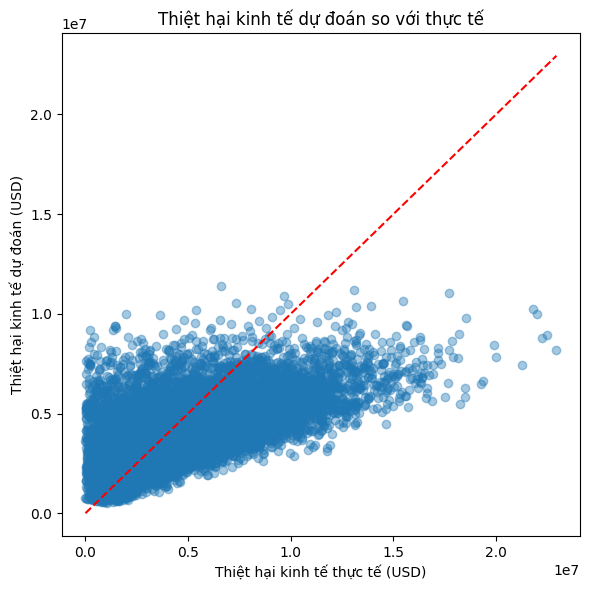

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test_real, y_pred, alpha=0.4)

plt.plot(
    [y_test_real.min(), y_test_real.max()],
    [y_test_real.min(), y_test_real.max()],
    color="red",
    linestyle="--"
)

plt.xlabel("Thiệt hại kinh tế thực tế (USD)")
plt.ylabel("Thiệt hại kinh tế dự đoán (USD)")
plt.title("Thiệt hại kinh tế dự đoán so với thực tế")
plt.tight_layout()
plt.show()



-XGBOOST dự đoán các giá trị thiệt hại cao tốt hơn RFR nhưng tổng thể mô hình vẫn tệ

-XGBoost sau khi LogTrainForm biến mục tiêu thì tệ hơn lúc chưa Log